In [1]:
!pip install psaw

In [2]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

In [3]:
from psaw import PushshiftAPI

# Initialize PushShift
api = PushshiftAPI()

In [4]:
#change dates and seach term

import datetime as dt

start_epoch=int(dt.datetime(2015, 1, 1).timestamp())
end_epoch=int(dt.datetime(2021, 8, 10).timestamp())

api_request_generator = api.search_submissions(q='(Tampon Tax)', after = start_epoch, before=end_epoch)

In [5]:
Reddit_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [6]:
Reddit_submissions.shape

(1601, 97)

In [7]:
Reddit_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subre

In [8]:
Reddit_submissions[['title', 'score']].sample(10)

,title,score
486,"/u/STDCatcher69 on Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1
1001,"[UK] - #PMfortheday: Teens on voting, tampon tax and farming",1
663,[UK] - Tampon tax: women's charities urge for cash to be ringfenced,1
303,"/u/redorangeblue on Germany scraps 'tampon tax,' as menstrual products not a 'luxury' - Menstrual products have long been taxed at a higher rate in Germany than many other everyday necessities — a form of discrimination, say activists. Even goldfish and cut flowers benefit from a lower VAT.",1
148,"Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1
107,[World] - Britain credits Brexit for abolishing ‘tampon tax’ | Manila Bulletin,1
294,"/u/ChopsMagee on Germany scraps 'tampon tax,' as menstrual products not a 'luxury' - Menstrual products have long been taxed at a higher rate in Germany than many other everyday necessities — a form of discrimination, say activists. Even goldfish and cut flowers benefit from a lower VAT.",1
55,UK abolishes 'tampon tax' on menstrual products,1
174,"Do you think men should be involved in policies over women’s health (tampon tax, abortion etc)? Why/why not?",1
70,/r/worldnews - https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,1


In [9]:
Reddit_submissions['date'] = pd.to_datetime(Reddit_submissions['created_utc'], utc=True, unit='s')

In [10]:
Reddit_submissions[['author', 'date', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,trifletruffles,2021-07-30 13:39:57+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",https://www.reddit.com/r/Assistance/comments/ouksht/tamponspadsmenstrual_cups/,Assistance,1,26,0.0
1,n_Jee,2021-07-22 11:49:28+00:00,Thailand imposes tampon tax,[removed],https://www.reddit.com/r/Feminism/comments/opc841/thailand_imposes_tampon_tax/,Feminism,1,5,0.0
2,tharealbigjc22,2021-07-17 01:36:10+00:00,You Know What Angers Me?: The Period Tax,"This is the tax that is tacked on to feminine hygiene products because in many countries tampons, pads, that sort of thing are considered a luxury rather than a necessity which it is. Taxing the very things that a woman needs during her time of the month is like having to pay a 200% mark-up for toilet paper just because it's made from Japanese trees. [This is actually real by the way](https://www.odditycentral.com/news/fit-for-a-royal-behind-hanebisho-the-worlds-most-expensive-toilet-paper-t...",https://www.reddit.com/r/rant/comments/olusg8/you_know_what_angers_me_the_period_tax/,rant,1,7,0.0
3,trifletruffles,2021-07-16 13:54:49+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",https://www.reddit.com/r/Assistance/comments/olhbcn/tamponspadsmenstrual_cups/,Assistance,1,82,0.0
4,Ominous_Koreageek,2021-07-03 19:41:04+00:00,Aria fresca da Bruxelles: accesso all’aborto come diritto umano ed eliminazione della tampon tax - Possibile,,https://www.possibile.com/aria-fresca-da-bruxelles-accesso-allaborto-come-diritto-umano-ed-eliminazione-della-tampon-tax/,king_of_the_south,1,0,0.0
...,...,...,...,...,...,...,...,...,...
1596,QueenAnneBoleynTudor,2015-03-29 05:07:47+00:00,I think my husband did something to one of our twins: CONCLUSION-1,"Now that the investigation is over...as promised, here is the conclusion of what happened. Reddit won't let me post the whole thing at once, so here's the 1st part\n\n[Part One] (http://www.reddit.com/r/nosleep/comments/2ssxjr/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Two] (http://www.reddit.com/r/nosleep/comments/2swn5i/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Three] (http://www.reddit.com/r/nosleep/comments/2t0uep/i_think_my_husband_did_something_to_one_of_...",http://www.reddit.com/r/nosleep/comments/30oae2/i_think_my_husband_did_something_to_one_of_our/,nosleep,394,81,NaN
1597,LARPeasant,2015-03-19 05:24:05+00:00,"CMV: Taxing Tampons/Pads in Canada should continue, because of a myriad of costs related to disposal and clean-up, and that they're in-fact a convenience.","Alright, I realize there has been a previous thread in regards to this topic, but I didn't find it convincing enough to CMV, thus I find myself posting this. \n\nIn the past and today, alternatives exist to the disposable tampon/hygiene pad, which incur a lower cost and are environmentally friendly. The widespread habit of flushing disposable pads/tampons down toilets costs municipalities upwards of millions of dollars, already far more 

In [11]:
Reddit_df=Reddit_submissions[['author', 'date', 'title', 'selftext', 'url', 'subreddit', 'score', 
                                    'num_comments', 'num_crossposts']]

In [12]:
Reddit_df

,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,trifletruffles,2021-07-30 13:39:57+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",https://www.reddit.com/r/Assistance/comments/ouksht/tamponspadsmenstrual_cups/,Assistance,1,26,0.0
1,n_Jee,2021-07-22 11:49:28+00:00,Thailand imposes tampon tax,[removed],https://www.reddit.com/r/Feminism/comments/opc841/thailand_imposes_tampon_tax/,Feminism,1,5,0.0
2,tharealbigjc22,2021-07-17 01:36:10+00:00,You Know What Angers Me?: The Period Tax,"This is the tax that is tacked on to feminine hygiene products because in many countries tampons, pads, that sort of thing are considered a luxury rather than a necessity which it is. Taxing the very things that a woman needs during her time of the month is like having to pay a 200% mark-up for toilet paper just because it's made from Japanese trees. [This is actually real by the way](https://www.odditycentral.com/news/fit-for-a-royal-behind-hanebisho-the-worlds-most-expensive-toilet-paper-t...",https://www.reddit.com/r/rant/comments/olusg8/you_know_what_angers_me_the_period_tax/,rant,1,7,0.0
3,trifletruffles,2021-07-16 13:54:49+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",https://www.reddit.com/r/Assistance/comments/olhbcn/tamponspadsmenstrual_cups/,Assistance,1,82,0.0
4,Ominous_Koreageek,2021-07-03 19:41:04+00:00,Aria fresca da Bruxelles: accesso all’aborto come diritto umano ed eliminazione della tampon tax - Possibile,,https://www.possibile.com/aria-fresca-da-bruxelles-accesso-allaborto-come-diritto-umano-ed-eliminazione-della-tampon-tax/,king_of_the_south,1,0,0.0
...,...,...,...,...,...,...,...,...,...
1596,QueenAnneBoleynTudor,2015-03-29 05:07:47+00:00,I think my husband did something to one of our twins: CONCLUSION-1,"Now that the investigation is over...as promised, here is the conclusion of what happened. Reddit won't let me post the whole thing at once, so here's the 1st part\n\n[Part One] (http://www.reddit.com/r/nosleep/comments/2ssxjr/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Two] (http://www.reddit.com/r/nosleep/comments/2swn5i/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Three] (http://www.reddit.com/r/nosleep/comments/2t0uep/i_think_my_husband_did_something_to_one_of_...",http://www.reddit.com/r/nosleep/comments/30oae2/i_think_my_husband_did_something_to_one_of_our/,nosleep,394,81,NaN
1597,LARPeasant,2015-03-19 05:24:05+00:00,"CMV: Taxing Tampons/Pads in Canada should continue, because of a myriad of costs related to disposal and clean-up, and that they're in-fact a convenience.","Alright, I realize there has been a previous thread in regards to this topic, but I didn't find it convincing enough to CMV, thus I find myself posting this. \n\nIn the past and today, alternatives exist to the disposable tampon/hygiene pad, which incur a lower cost and are environmentally friendly. The widespread habit of flushing disposable pads/tampons down toilets costs municipalities upwards of millions of dollars, already far more 

In [13]:
Reddit_df[Reddit_df.duplicated(keep=False)]

,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts


In [14]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('canada')==False]

In [15]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('canada')==False]

In [16]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('ukip')==False]

In [17]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('ukip')==False]

In [18]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('uk')==False]

In [19]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('uk')==False]

In [20]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('thailand')==False]

In [21]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('thailand')==False]

In [22]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('ita')==False]

In [23]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('ita')==False]

In [24]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('Eu')==False]

In [25]:
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('Eu')==False]

In [26]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('bruxelles')==False]

In [27]:
Reddit_df=Reddit_df[Reddit_df['subreddit'].str.lower().str.contains('canada')==False]

In [28]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('labor')==False]

In [29]:
Reddit_df

,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts
8,msmoley,2021-06-02 10:00:16+00:00,Women’s rights activists in the Bahamas celebrate elimination of “tampon tax”,,https://ewnews.com/a-great-start-womens-rights-activists-celebrate-elimination-of-tampon-tax-pink-tax-in-the-bahamas,WomenInNews,1,0,0.0
9,AutoNewspaperAdmin,2021-05-28 09:21:55+00:00,[Politics] - Women’s Equality Starts With Ending the Tampon Tax | The Daily Beast,,https://www.thedailybeast.com/womens-equality-starts-with-ending-the-tampon-tax?source=politics&amp;via=rss,AutoNewspaper,1,0,0.0
10,AutoNewsAdmin,2021-05-28 08:57:50+00:00,[Politics] - Women’s Equality Starts With Ending the Tampon Tax,,https://www.thedailybeast.com/womens-equality-starts-with-ending-the-tampon-tax?source=politics&amp;via=rss,TDBauto,1,0,0.0
12,InfantryMOD,2021-05-20 23:22:10+00:00,Final round of tampon tax fund launched,,https://www.gov.uk/government/news/final-round-of-tampon-tax-fund-launched,prsuk,1,0,0.0
14,yellowmix,2021-05-05 20:29:34+00:00,Does Your State Have a Tampon Tax? This Map Will Show You,,https://www.yahoo.com/lifestyle/does-state-tampon-tax-map-143000492.html,feminisms,1,2,0.0
...,...,...,...,...,...,...,...,...,...
1576,rotoreuters,2015-05-26 02:11:18+00:00,Australia tampon tax in sightlines,,http://www.bbc.co.uk/news/world-australia-32879768#sa-ns_mchannel=rss&amp;ns_source=PublicRSS20-sa,betternews,1,0,NaN
1577,rotoreuters,2015-05-26 01:38:21+00:00,"Tampon tax: why are women paying GST on an essential health item, Larissa Waters asks – video",,http://www.theguardian.com/australia-news/video/2015/may/26/tampon-tax-gst-australia-hockey-budget-waters-greens-video,betternews,0,0,NaN
1578,rainynight65,2015-05-25 21:46:41+00:00,Hockey to lobby states to ditch GST tampon tax,,http://www.abc.net.au/news/2015-05-25/joe-hockey-says-he-will-put-tampon-tax-question-to-states/6496512,australia,4,13,NaN
1579,PoliticBot,2015-05-13 15:15:45+00:00,Tory women led caucus to support an end to tampon tax but NDP want it gone now,,http://www.theglobeandmail.com/news/politics/tory-women-led-caucus-to-support-an-end-to-tampon-tax-but-ndp-want-it-gone-now/article24403015/&amp;sa=U&amp;ei=tllTVdPYEsiHsQSPiIGwDQ&amp;ved=0CBgQqQIwAA&amp;usg=AFQjCNGv8axL79GxhuEdDyO_sNDXhFXCFQ,POLITIC,1,1,NaN


In [30]:
Reddit_df[['title', 'score']].sort_values(by='score', ascending=False)[:50]

,title,score
1020,13 States (5 of which have no sales tax) No Longer Tax Feminine Hygiene Products and 15 More are Debating Doing Away With Their “Tampon Tax”,20583
1070,Anger as tampon tax is used to help fund anti-abortion group | Politics,3105
1022,13 States No Longer Tax Feminine Hygiene Products and 15 More are Debating Doing Away With Their “Tampon Tax”,2894
877,More States Move To End 'Tampon Tax' That's Seen As Discriminating Against Women,2481
871,More States Move To End 'Tampon Tax' That's Seen As Discriminating Against Women,1797
1293,Male Lawmaker Explains Why You Don't Have To Get A Period To Care About Repealing The Tampon Tax,1724
1245,New York is ending their Tampon Tax! WOOT!!!,1164
670,Denver City Council votes to remove ‘tampon tax’ from feminine hygiene products,1163
874,More States Move To End 'Tampon Tax' That's Seen As Discriminating Against Women,1139
1386,Women sue to block New York's 'Tampon Tax',1085


In [31]:
Reddit_df['author'].value_counts()

itchyyyyscrotum       65
[deleted]             60
AutoNewsAdmin         55
AutoNewspaperAdmin    50
ImaBlue               33
                      ..
boringcarpets          1
Light_Dark_Choose      1
tribe_of_frogs         1
auto022                1
IcrapRainbows          1
Name: author, Length: 502, dtype: int64

In [34]:
#petition
petition_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('petition')]
#change filename
petition_filter.to_csv("tampontax_Reddit_petition.csv", encoding='utf-8', index=True)

#sign
sign_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('sign')]
#change filename
sign_filter.to_csv("tampontax_Reddit_sign.csv", encoding='utf-8', index=True)


#vote
vote_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('vote')]
#change filename
vote_filter.to_csv("tampontax_Reddit_vote.csv", encoding='utf-8', index=True)


#call
call_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('call')]
#change filename
call_filter.to_csv("tampontax_Reddit_call.csv", encoding='utf-8', index=True)

#march
march_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('march')]
#change filename
march_filter.to_csv("tampontax_Reddit_march.csv", encoding='utf-8', index=True)

#representative
representative_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('representative')]
#change filename
representative_filter.to_csv("tampontax_Reddit_representative.csv", encoding='utf-8', index=True)

#gov
gov_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('gov')]
#change filename
gov_filter.to_csv("tampontax_Reddit_gov.csv", encoding='utf-8', index=True)


#demand
demand_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('demand')]
#change filename
demand_filter.to_csv("tampontax_Reddit_demand.csv", encoding='utf-8', index=True)

In [35]:
import pandas as pd
pd.options.display.max_rows = 100

#replace all file names/paths
call_df=pd.read_csv('tampontax_Reddit_call.csv', delimiter=',', encoding='utf-8')
demand_df=pd.read_csv('tampontax_Reddit_demand.csv', delimiter=',', encoding='utf-8')
gov_df=pd.read_csv('tampontax_Reddit_gov.csv', delimiter=',', encoding='utf-8')
march_df=pd.read_csv('tampontax_Reddit_march.csv', delimiter=',', encoding='utf-8')
petition_df=pd.read_csv('tampontax_Reddit_petition.csv', delimiter=',', encoding='utf-8')
representative_df=pd.read_csv('tampontax_Reddit_representative.csv', delimiter=',', encoding='utf-8')
sign_df=pd.read_csv('tampontax_Reddit_sign.csv', delimiter=',', encoding='utf-8')
vote_df=pd.read_csv('tampontax_Reddit_vote.csv', delimiter=',', encoding='utf-8')

frames=[call_df, demand_df, gov_df, march_df, petition_df, representative_df, sign_df, vote_df]

political_df = pd.concat(frames)

political_df.reset_index(inplace=True)

political_df=political_df.sort_values(by='date', ascending=True)


#replace file name
political_df.to_csv("tampontax_Reddit_political.csv", encoding='utf-8', index=False)
political_df.to_json("tampontax_Reddit_political.json", index=True, orient='columns')


political_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts
83,9,1575,rotoreuters,2015-05-26 03:40:32+00:00,‘Stop Taxing My Period!’ Online Petition To Cut Australian Tampon Sales Tax Caught The Attention Of Australia’s Federal Treasurer,NaN,http://www.ibtimes.com/stop-taxing-my-period-online-petition-cut-australian-tampon-sales-tax-caught-1937246,betternews,1,0,NaN
82,8,1573,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN
104,20,1573,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN
81,7,1571,epiphanot,2015-05-26 19:38:56+00:00,Thousands Of Aussie Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,news,1,0,NaN
103,19,1571,epiphanot,2015-05-26 19:38:56+00:00,Thousands Of Aussie Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,news,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
86,2,173,ygenluryak,2020-05-03 23:46:28+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/Periods/comments/gd0ujj/please_sign_this_petition_to_remove_the_tampon/,Periods,1,0,0.0
85,1,172,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0
74,0,172,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0
84,0,71,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0


In [36]:
#clean your date
#change filename
political_clean_df = pd.read_csv('tampontax_Reddit_political_clean.csv', delimiter=",")

In [37]:
political_clean_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,So-called 'Tampon tax' exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,NaN,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1.0
152,1,172.0,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,NaN
153,0,71.0,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,NaN
154,0,NaN,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0


<AxesSubplot:title={'center':'Reddit: Tampon Tax Political/ Most Frequent "Author Name"'}>

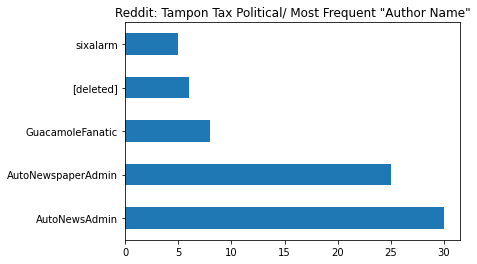

In [38]:
#Visually demonstrates who dominates the conversation
#Make sure to change title
political_clean_df['author'].value_counts()[:5].plot(kind='barh', title='Reddit: Tampon Tax Political/ Most Frequent "Author Name"')

In [39]:
political_clean_df[political_clean_df['author'] == 'AutoNewsAdmin']

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
45,25,1107.0,AutoNewsAdmin,2017-02-09 00:56:20+00:00,[Politics] - House panel passes over so-called tampon tax exemption without an up or down vote,NaN,http://www.sltrib.com/news/4919738-155/house-panel-passes-over-so-called-tampon,SLTRIBauto,1,0,NaN,NaN
46,25,1107.0,AutoNewsAdmin,2017-02-09 00:56:20+00:00,[Politics] - House panel passes over so-called tampon tax exemption without an up or down vote,NaN,http://www.sltrib.com/news/4919738-155/house-panel-passes-over-so-called-tampon,SLTRIBauto,1,0,NaN,NaN
47,15,1107.0,AutoNewsAdmin,2017-02-09 00:56:20+00:00,[Politics] - House panel passes over so-called tampon tax exemption without an up or down vote,NaN,http://www.sltrib.com/news/4919738-155/house-panel-passes-over-so-called-tampon,SLTRIBauto,1,0,NaN,NaN
48,25,1107.0,AutoNewsAdmin,2017-02-09 00:56:20+00:00,[Politics] - House panel passes over so-called tampon tax exemption without an up or down vote,NaN,http://www.sltrib.com/news/4919738-155/house-panel-passes-over-so-called-tampon,SLTRIBauto,1,0,NaN,NaN
49,25,1107.0,AutoNewsAdmin,2017-02-09 00:56:20+00:00,[Politics] - House panel passes over so-called tampon tax exemption without an up or down vote,NaN,http://www.sltrib.com/news/4919738-155/house-panel-passes-over-so-called-tampon,SLTRIBauto,1,0,NaN,NaN
57,23,1087.0,AutoNewsAdmin,2017-03-31 01:37:21+00:00,[Politics] - Nevada lawmakers consider asking voters to delete tampon tax,NaN,http://www.miamiherald.com/news/business/article141863879.html#storylink=rss,MIAMIHERALDauto,1,0,NaN,NaN
58,23,1087.0,AutoNewsAdmin,2017-03-31 01:37:21+00:00,[Politics] - Nevada lawmakers consider asking voters to delete tampon tax,NaN,http://www.miamiherald.com/news/business/article141863879.html#storylink=rss,MIAMIHERALDauto,1,0,NaN,NaN
59,23,1087.0,AutoNewsAdmin,2017-03-31 01:37:21+00:00,[Politics] - Nevada lawmakers consider asking voters to delete tampon tax,NaN,http://www.miamiherald.com/news/business/article141863879.html#storylink=rss,MIAMIHERALDauto,1,0,NaN,NaN
60,23,1087.0,AutoNewsAdmin,2017-03-31 01:37:21+00:00,[Politics] - Nevada lawmakers consider asking voters to delete tampon tax,NaN,http://www.miamiherald.com/news/business/article141863879.html#storylink=rss,MIAMIHERALDauto,1,0,NaN,NaN
65,21,1085.0,AutoNewsAdmin,2017-03-31 02:34:05+00:00,[Business] - Nevada lawmakers consider asking voters to delete tampon tax,NaN,http://www.washingtontimes.com/news/2017/mar/30/nevada-lawmakers-consider-asking-voters-to-delete-/?utm_source=RSS_Feed&amp;utm_medium=RSS,TWTauto,1,0,NaN,NaN


In [40]:
political_clean_df['subreddit'].value_counts()

AutoNewspaper          25
TWTauto                10
MIAMIHERALDauto        10
women                   9
Denver                  8
SLTRIBauto              5
TwoXChromosomes         5
GeekyCulture            5
nottheonion             4
FOXauto                 4
TheColorIsRed           4
IndustrialPharmacy      4
FreedomNewsPolitics     4
offbeat                 4
MGTOW2                  4
nofeenews               4
newyork                 4
pussypassdenied         4
Feminism                3
newsbotbot              3
HOTandTRENDING          3
worldnews               3
Business_Analyst        2
Periods                 2
ask                     2
menstruation            2
news                    2
BreakingNews24hr        2
florida                 2
explainlikeimfive       2
3novices                2
NoFilterNews            2
OzNewsHeadlines         1
TheColorIsBlue          1
SRSsucks                1
Mainepolitics           1
Utahpolitics            1
findareddit             1
GUARDIANauto

In [41]:
political_clean_df[['title','subreddit', 'score']].sort_values(by='score', ascending=False)[:50]

,title,subreddit,score
133,Denver City Council votes to remove ‘tampon tax’ from feminine hygiene products,Denver,1163
135,Denver City Council votes to remove ‘tampon tax’ from feminine hygiene products,Denver,1163
136,Denver City Council votes to remove ‘tampon tax’ from feminine hygiene products,Denver,1163
134,Denver City Council votes to remove ‘tampon tax’ from feminine hygiene products,Denver,1163
28,Gov. Rauner Signs Repeal Of 'Tampon Tax' In Illinois,news,245
29,Gov. Rauner Signs Repeal Of 'Tampon Tax' In Illinois,news,245
41,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",pussypassdenied,140
40,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",pussypassdenied,140
39,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",pussypassdenied,140
38,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",pussypassdenied,140


<AxesSubplot:title={'center':'Reddit: Tampon Tax Political/ Most Frequent "Sub Reddit"'}>

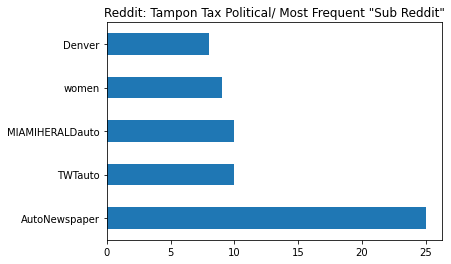

In [42]:
#Visually demonstrates who dominates the conversation
#Make sure to change title
political_clean_df['subreddit'].value_counts()[:5].plot(kind='barh', title='Reddit: Tampon Tax Political/ Most Frequent "Sub Reddit"')

In [43]:
political_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           156 non-null    int64  
 1   Unnamed: 0      139 non-null    float64
 2   author          156 non-null    object 
 3   date            156 non-null    object 
 4   title           156 non-null    object 
 5   selftext        25 non-null     object 
 6   url             156 non-null    object 
 7   subreddit       156 non-null    object 
 8   score           156 non-null    int64  
 9   num_comments    156 non-null    int64  
 10  num_crossposts  51 non-null     float64
 11  count           17 non-null     float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.8+ KB


In [44]:
# Convert the date column to datetime values
political_clean_df['date'] = pd.to_datetime(political_clean_df['date'])

In [45]:
political_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   index           156 non-null    int64              
 1   Unnamed: 0      139 non-null    float64            
 2   author          156 non-null    object             
 3   date            156 non-null    datetime64[ns, UTC]
 4   title           156 non-null    object             
 5   selftext        25 non-null     object             
 6   url             156 non-null    object             
 7   subreddit       156 non-null    object             
 8   score           156 non-null    int64              
 9   num_comments    156 non-null    int64              
 10  num_crossposts  51 non-null     float64            
 11  count           17 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(5)
memory usage: 14.8+ KB


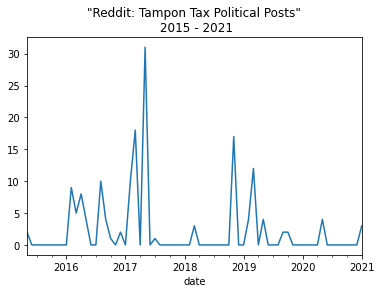

In [46]:
political_clean_df = political_clean_df.assign(count=1)
political_clean_df = political_clean_df.set_index('date')


#Replace title
political_clean_df['count'].resample('M').sum()\
.plot(title='"Reddit: Tampon Tax Political Posts"\n 2015 - 2021');

In [47]:
political_clean_df.reset_index()

,date,index,Unnamed: 0,author,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,2015-05-26 18:30:23+00:00,20,1573.0,drewiepoodle,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1
1,2015-05-26 18:30:23+00:00,20,NaN,drewiepoodle,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1
2,2016-02-11 02:41:30+00:00,24,1397.0,pnoque,So-called 'Tampon tax' exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,1
3,2016-02-12 15:01:22+00:00,32,1395.0,anutensil,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,1
4,2016-02-12 15:01:22+00:00,32,1395.0,anutensil,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,2020-05-03 23:49:07+00:00,1,NaN,ygenluryak,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1
152,2020-05-03 23:49:07+00:00,1,172.0,ygenluryak,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1
153,2021-01-02 02:17:25+00:00,0,71.0,honolulu_oahu_mod,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1
154,2021-01-02 02:17:25+00:00,0,NaN,honolulu_oahu_mod,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1


In [48]:
!pip install vaderSentiment

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

pd.options.display.max_colwidth = 400

#change filename
political_clean_df = pd.read_csv('tampontax_Reddit_political_clean.csv')
#tweets_df = tweets_df.drop(['id'], axis='columns')

def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
political_clean_df['sentiment_score'] = political_clean_df['title'].apply(calculate_sentiment)

#political_df.rename(columns={'created_at': 'date'},
                            #inplace=True)

# Convert the date column to datetime values
political_clean_df['date'] = pd.to_datetime(political_clean_df['date'])

# Make date the index of the DataFrame
political_clean_df = political_clean_df.set_index('date')

political_clean_df.sort_values(by='sentiment_score', ascending=False)[:10]

,index,Unnamed: 0,author,title,selftext,url,subreddit,score,num_comments,num_crossposts,count,sentiment_score
date,,,,,,,,,,,,
2019-05-08 17:49:08+00:00,0,655.0,RealistPhilosopher,Governor Newsom of California wants to remove all tax from Female products starting with tampons and diapers. Obviously to help single mothers. His loyal voters. What scum.,"I think we will eventually get to a point where women will not even pretend to pay tax. They already on average take more than they put in, and men pay all the taxes. Now they want even more special treatment by demanding that they7 shouldn't have to pay any taxes on tampon, and diapers. What's next? You know what's next. No taxes because meh, ""Patriarchy.""\n\n&amp;#x200B;\n\nThis video talks ...",https://www.reddit.com/r/MGTOW2/comments/bm8dbb/governor_newsom_of_california_wants_to_remove_all/,MGTOW2,1,1,0.0,NaN,0.7003
2019-05-08 17:49:08+00:00,0,655.0,RealistPhilosopher,Governor Newsom of California wants to remove all tax from Female products starting with tampons and diapers. Obviously to help single mothers. His loyal voters. What scum.,"I think we will eventually get to a point where women will not even pretend to pay tax. They already on average take more than they put in, and men pay all the taxes. Now they want even more special treatment by demanding that they7 shouldn't have to pay any taxes on tampon, and diapers. What's next? You know what's next. No taxes because meh, ""Patriarchy.""\n\n&amp;#x200B;\n\nThis video talks ...",https://www.reddit.com/r/MGTOW2/comments/bm8dbb/governor_newsom_of_california_wants_to_remove_all/,MGTOW2,1,1,0.0,NaN,0.7003
2019-05-08 17:49:08+00:00,0,655.0,RealistPhilosopher,Governor Newsom of California wants to remove all tax from Female products starting with tampons and diapers. Obviously to help single mothers. His loyal voters. What scum.,"I think we will eventually get to a point where women will not even pretend to pay tax. They already on average take more than they put in, and men pay all the taxes. Now they want even more special treatment by demanding that they7 shouldn't have to pay any taxes on tampon, and diapers. What's next? You know what's next. No taxes because meh, ""Patriarchy.""\n\n&amp;#x200B;\n\nThis video talks ...",https://www.reddit.com/r/MGTOW2/comments/bm8dbb/governor_newsom_of_california_wants_to_remove_all/,MGTOW2,1,1,0.0,NaN,0.7003
2019-05-08 17:49:08+00:00,0,655.0,RealistPhilosopher,Governor Newsom of California wants to remove all tax from Female products starting with tampons and diapers. Obviously to help single mothers. His loyal voters. What scum.,"I think we will eventually get to a point where women will not even pretend to pay tax. They already on average take more than they put in, and men pay all the taxes. Now they want even more special treatment by demanding that they7 shouldn't have to pay any taxes on tampon, and diapers. What's next? You know what's next. No taxes because meh, ""Patriarchy.""\n\n&amp;#x200B;\n\nThis video talks ...",https://www.reddit.com/r/MGTOW2/comments/bm8dbb/governor_newsom_of_california_wants_to_remove_all/,MGTOW2,1,1,0.0,NaN,0.7003
2017-05-09 00:49:14+00:00,18,1005.0,AutoNewsAdmin,"[Business] - Florida lawmakers vote to end 'tampon tax,' ok tax holidays",NaN,http://www.washingtontimes.com/news/2017/may/8/florida-lawmakers-vote-to-end-tampon-tax-ok-tax-ho/?utm_source=RSS_Feed&amp;utm_medium=RSS,TWTauto,1,0,NaN,NaN,0.5859
2017-05-09 00:58:23+00:00,17,1004.0,AutoNewspaperAdmin,"[Politics] - Florida lawmakers vote to end 'tampon tax,' ok tax holidays | Miami Herald",NaN,http://www.miamiherald.com/news/article149399459.html#storylink=rss,AutoNewspaper,1,0,NaN,NaN,0.5859
2017-05-09 00:41:16+00:00,19,1006.0,AutoNewsAdmin,"[Politics] - Florida lawmakers vote to end 'tampon tax,' ok tax holidays",NaN,http://www.miamiherald.com/news/article149399459.html#storylink=rss,MIAMIHERALDauto,1,0,NaN,NaN,0.5859
2017-05-09 00:41:16+00:00,19,1006.0,AutoNewsAdmin,"[Politics] - Florida lawma

In [50]:
political_clean_df.sort_values(by='sentiment_score', ascending=True)[:10]

,index,Unnamed: 0,author,title,selftext,url,subreddit,score,num_comments,num_crossposts,count,sentiment_score
date,,,,,,,,,,,,
2016-09-18 02:23:51+00:00,26,1179.0,25russianbear25,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",NaN,http://www.snopes.com/tampon-tax/,pussypassdenied,140,45,NaN,NaN,-0.7549
2016-09-18 02:23:51+00:00,26,1179.0,25russianbear25,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",NaN,http://www.snopes.com/tampon-tax/,pussypassdenied,140,45,NaN,NaN,-0.7549
2016-09-18 02:23:51+00:00,26,1179.0,25russianbear25,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",NaN,http://www.snopes.com/tampon-tax/,pussypassdenied,140,45,NaN,NaN,-0.7549
2016-09-18 02:23:51+00:00,26,1179.0,25russianbear25,"The ""tampon tax"" post got heavily down voted because of misinformation. There isnt any ""special"" tax on tampons, just regular tax. Deny the false info &amp; lies please.",NaN,http://www.snopes.com/tampon-tax/,pussypassdenied,140,45,NaN,NaN,-0.7549
2018-03-07 06:30:58+00:00,9,891.0,bluethecoloris,Tanya Plibersek calls for repeal of 'dumb' tampon tax,NaN,https://www.theguardian.com/australia-news/2018/mar/07/tanya-plibersek-calls-for-repeal-of-dumb-tampon-tax,TheColorIsBlue,1,0,0.0,NaN,-0.5106
2018-03-07 06:39:12+00:00,8,890.0,AutoNewsAdmin,[World] - Tanya Plibersek calls for repeal of 'dumb' tampon tax,NaN,https://www.theguardian.com/australia-news/2018/mar/07/tanya-plibersek-calls-for-repeal-of-dumb-tampon-tax,GUARDIANauto,1,0,0.0,NaN,-0.5106
2016-02-11 02:41:30+00:00,24,1397.0,pnoque,So-called 'Tampon tax' exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN,-0.4767
2017-07-28 16:40:43+00:00,10,963.0,[deleted],Tampon tax: Call for abolition timetable as Tesco cuts price,[deleted],http://www.bbc.co.uk/news/business-40750716,Feminism,1,0,NaN,NaN,-0.2960
2021-01-02 02:17:25+00:00,0,NaN,honolulu_oahu_mod,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0,-0.2960


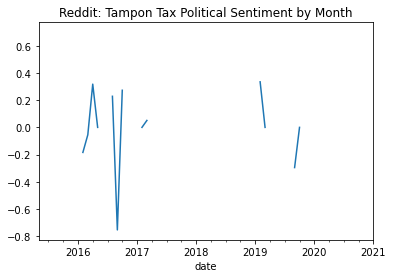

In [51]:
#Change graph title
political_clean_df.resample('M')['sentiment_score'].mean().plot(
    title="Reddit: Tampon Tax Political Sentiment by Month");

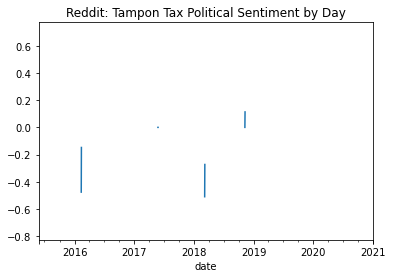

In [52]:
#Change graph title
political_clean_df.resample('D')['sentiment_score'].mean().plot(
    title="Reddit: Tampon Tax Political Sentiment by Day");

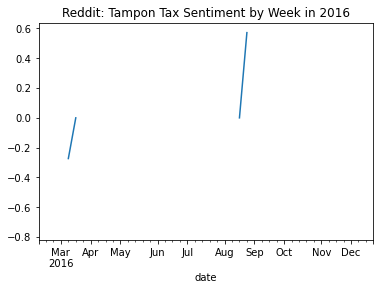

In [53]:
#Change graph title & date
political_clean_df.loc["2016"].resample('W')['sentiment_score'].mean().plot(
    title="Reddit: Tampon Tax Sentiment by Week in 2016");

In [54]:
#text pre-processing. Code from https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/?#

import pandas as pd
pd.options.display.max_rows = 100
import nltk
import matplotlib
%matplotlib inline

#change filename
political_clean_df = pd.read_csv('tampontax_Reddit_political_clean.csv')


#Make lowercase
political_clean_df['title'] = political_clean_df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))


#remove punctuation
political_clean_df['title'] = political_clean_df['title'].str.replace('[^\w\s]','')

#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

new_stopwords=['tampon','tax', 'ha', 'product', 'wa','woman','new','menstrual', 'english', 'period', 'hygiene','say',
              'school', 'httpstcoea1fxdiznn', 'julissaferreras', 'danismcnally', 'asmgarcia', 'thank','great', 'amp',
               'pls', 'state', 'joannacoles', 'thanks','tamponsforall', 'menstrualequity']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

political_clean_df['title'] = political_clean_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stpwrd))

#remove common words
freq = pd.Series(' '.join(political_clean_df['title']).split()).value_counts()[:10]
freq
freq = list(freq.index)
political_clean_df['title'] = political_clean_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#remove rare words
freq = pd.Series(' '.join(political_clean_df['title']).split()).value_counts()[-10:]
freq
freq = list(freq.index)
political_clean_df['title'] = political_clean_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#correct spelling - we cannot always expect it to be accurate so some care should be taken before applying it.
#from textblob import TextBlob
#tweets_df['text'].apply(lambda x: str(TextBlob(x).correct()))


#tokenize
from textblob import TextBlob
TextBlob(political_clean_df['title'][1]).words

#lemmatize
from textblob import Word
political_clean_df['title'] = political_clean_df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


Reddit_df=political_clean_df

#replace file name
political_clean_df.to_csv("tampontax_Reddit_political_processed.csv", encoding='utf-8', index=False)

political_clean_df['title'].head()

<ipython-input-54-6e791e1e350d>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  political_clean_df['title'] = political_clean_df['title'].str.replace('[^\w\s]','')


0    thousand woman sign petition
1    thousand woman sign petition
2              exemption defeated
3              utah official keep
4              utah official keep
Name: title, dtype: object

In [55]:
political_clean_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,NaN,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1.0
152,1,172.0,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,NaN
153,0,71.0,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,NaN
154,0,NaN,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0


In [56]:
Reddit_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,NaN,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1.0
152,1,172.0,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,NaN
153,0,71.0,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,NaN
154,0,NaN,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0


In [57]:
#create N-grams
TextBlob(Reddit_df['title'][0]).ngrams(4)

[WordList(['thousand', 'woman', 'sign', 'petition'])]

In [58]:
TextBlob(Reddit_df['title'][0]).ngrams(2)

[WordList(['thousand', 'woman']),
 WordList(['woman', 'sign']),
 WordList(['sign', 'petition'])]

In [59]:
#Term frequency
tf1 = (Reddit_df['title']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.sort_values(by='tf', ascending=False)[:10]

,words,tf
2,sign,26.0
26,eliminate,21.0
150,remove,20.0
94,business,20.0
32,gov,20.0
37,bill,18.0
91,delete,16.0
98,holiday,16.0
97,ok,16.0
89,consider,16.0


In [60]:
#Inverse Document Frequency: The intuition behind inverse document frequency (IDF) 
#is that a word is not of much use to us if it’s appearing in all the documents.
#Therefore, the IDF of each word is the log of the ratio of the total number of rows 
#to the number of rows in which that word is present.

import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(Reddit_df.shape[0]/(len(Reddit_df[Reddit_df['title'].str.contains(word)])))

tf1.sort_values(by='idf', ascending=False)[:10]

,words,tf,idf
23,jersey,1.0,5.049856
18,date,1.0,5.049856
110,equality,1.0,5.049856
22,massachusetts,1.0,5.049856
175,nationalperiodday,1.0,5.049856
67,issue,1.0,5.049856
66,openly,1.0,5.049856
65,talk,1.0,5.049856
64,reddit,1.0,5.049856
111,correct,1.0,5.049856


In [61]:
tf1.sort_values(by='idf', ascending=True)[:10]

,words,tf,idf
177,u,2.0,0.444686
2,sign,26.0,1.494508
39,tax,4.0,1.682560
32,gov,20.0,1.717651
171,day,5.0,1.958814
26,eliminate,21.0,2.005334
150,remove,20.0,2.054124
94,business,20.0,2.054124
37,bill,18.0,2.159484
100,end,14.0,2.277267


In [62]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
#TF-IDF is the multiplication of the TF and IDF which we calculated above.

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,thousand,2.0,4.356709,8.713418
1,woman,5.0,3.663562,18.317808
2,sign,26.0,1.494508,38.857207
3,petition,8.0,2.970414,23.763316
4,exemption,11.0,2.651961,29.171568
...,...,...,...,...
205,activist,3.0,3.951244,11.853731
206,onwards,3.0,3.951244,11.853731
207,5,3.0,3.258097,9.774290
208,nonessential,3.0,3.951244,11.853731


In [63]:
tf1.sort_values(by='tfidf', ascending=False)[:25]

,words,tf,idf,tfidf
26,eliminate,21.0,2.005334,42.112005
150,remove,20.0,2.054124,41.082475
94,business,20.0,2.054124,41.082475
37,bill,18.0,2.159484,38.870716
2,sign,26.0,1.494508,38.857207
89,consider,16.0,2.277267,36.436277
91,delete,16.0,2.277267,36.436277
97,ok,16.0,2.277267,36.436277
98,holiday,16.0,2.277267,36.436277
90,asking,16.0,2.277267,36.436277


In [64]:
Reddit_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,thousand woman sign petition,NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,utah official keep,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,NaN,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1.0
152,1,172.0,ygenluryak,2020-05-03 23:49:07+00:00,please sign petition remove michigan,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,NaN
153,0,71.0,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,NaN
154,0,NaN,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,longer classed luxury nonessential item taxed 5 year day onwards activist campaigning overhaul year said change signal sexist taxation policy place since 1973,NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0


In [ ]:
['id','author', 'score','upvote_ratio' ,'num_comments', 'subreddit']